# The webscraper to scrape 5 kinds of vehicles (car, bike, bus, plain, boat).

In [209]:
!pip install requests
!pip install BeautifulSoup4
!pip install selenium
!pip install seaborn


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
  Using cached seaborn-0.13.0-py3-none-any.whl.metadata (5.3 kB)
Using cached seaborn-0.13.0-py3-none-any.whl (294 kB)



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [210]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing import image
from keras.utils import image_dataset_from_directory
from keras.preprocessing.image import ImageDataGenerator
import seaborn as sns

from keras import optimizers
from keras import layers

from selenium import webdriver
from selenium import webdriver
import os
import time
import requests
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import urllib.request
import random

In [16]:


#image_urls = []
# Launch Chrome browser
browser = webdriver.Chrome()
browser.get('https://images.google.com/')

cookies = browser.find_element(By.ID,"L2AGLb")
cookies.click()

time.sleep(5)

def searchVehicles(vehicle):
# Open Google Images
    browser.get('https://images.google.com/')
# Search for "car pictures"
    search_box = browser.find_element(By.NAME,'q')
    search_box.send_keys(vehicle+' pictures')
    search_box.submit()

# Scroll down to load more images
    for i in range(5):
        browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(3)

# Find and extract image URLs
    
    for img in browser.find_elements(By.XPATH,'//img[contains(@class,"rg_i")]'):
        image_urls.append(img.get_attribute('src'))



vehicles = ['car', 'motorbike', 'bus', 'plane', 'boat']
for vehicle in vehicles:
    image_urls = []
    searchVehicles(vehicle)
    if not os.path.exists('data/testing_set/'+vehicle):
            os.makedirs('data/testing_set/'+vehicle)
    if not os.path.exists('data/training_set/'+vehicle):
            os.makedirs('data/training_set/'+vehicle)

    i=0
    np.random.shuffle(image_urls)
    for url in image_urls:
        if i<=int(len(image_urls) * 0.2):
            try:
                urllib.request.urlretrieve(url, f"data/testing_set/{vehicle}/{vehicle}.{i}.jpg")
            except:
                x = 0
        else:
            try:
                urllib.request.urlretrieve(url, f"data/training_set/{vehicle}/{vehicle}.{i}.jpg")
            except:
                x = 0
        i+=1

browser.quit()

# EDA

In [216]:
root_directory = "./data"
def count_pictures(root_directory, vehicle):
    counter = 0
    for foldername, subfolders, filenames in os.walk(root_directory):
        for filename in filenames:
            if vehicle in filename:
                counter += 1
    return counter

vehicles = ['boat', 'bus', 'car', 'motorbike', 'plane']
total_count = 0
for vehicle in vehicles:
    count = count_pictures(root_directory, vehicle)
    print(f"Number of pictures of a {vehicle}: {count}")
    total_count += count
    count = 0
print(f"Total amount of pictures: {total_count}")

Number of pictures of a boat: 184
Number of pictures of a bus: 167
Number of pictures of a car: 187
Number of pictures of a motorbike: 202
Number of pictures of a plane: 170
Total amount of pictures: 910


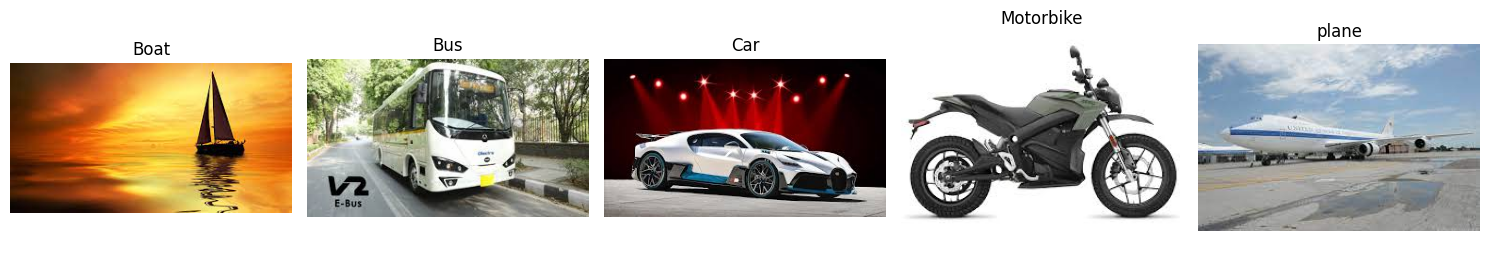

In [217]:
image_data = [
    {"path": "./data/testing_set/boat/boat.13.jpg", "title": "Boat"},
    {"path": "./data/testing_set/bus/bus.2.jpg", "title": "Bus"},
    {"path": "./data/testing_set/car/car.2.jpg", "title": "Car"},
    {"path": "./data/testing_set/motorbike/motorbike.0.jpg", "title": "Motorbike"},
    {"path": "./data/testing_set/plane/plane.26.jpg", "title": "plane"}
]

# Create a figure with a 1x5 grid of subplots
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

# Loop through the image data and display each image with a title
for i, image_info in enumerate(image_data):
    img = mpimg.imread(image_info["path"])
    axes[i].imshow(img)
    axes[i].axis('off')  # Hide the axis (optional)
    axes[i].set_title(image_info["title"])

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

# Split the dataset

In [218]:
train_val_datagen = ImageDataGenerator(validation_split=0.2,
                                   rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_val_datagen.flow_from_directory('data/training_set',
                                                 subset='training',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical') 

validation_set = train_val_datagen.flow_from_directory('data/training_set',
                                                 subset='validation',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('data/testing_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 607 images belonging to 5 classes.


Found 149 images belonging to 5 classes.
Found 154 images belonging to 5 classes.


# models

In [219]:

train_val_datagen = ImageDataGenerator(validation_split=0.2,
                                   rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_val_datagen.flow_from_directory('data/training_set',
                                                 subset='training',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical') 

validation_set = train_val_datagen.flow_from_directory('data/training_set',
                                                 subset='validation',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('data/testing_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 607 images belonging to 5 classes.


Found 149 images belonging to 5 classes.
Found 154 images belonging to 5 classes.


In [220]:
NUM_CLASSES = 5

# Create a sequential model with a list of layers
model = tf.keras.Sequential([
  layers.Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation="relu"),
  layers.MaxPooling2D((2, 2)),
  layers.Dropout(0.2),
  layers.Conv2D(256, (3, 3), activation="relu"),
  layers.MaxPooling2D((2, 2)),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation="sigmoid"),
  layers.Dense(NUM_CLASSES, activation="softmax")
])

# Compile and train your model as usual
model.compile(optimizer = optimizers.Adam(learning_rate=0.001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

print(model.summary())

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_64 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_64 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_64 (Dropout)        (None, 31, 31, 32)        0         
                                                                 
 conv2d_65 (Conv2D)          (None, 29, 29, 256)       73984     
                                                                 
 max_pooling2d_65 (MaxPooli  (None, 14, 14, 256)       0         
 ng2D)                                                           
                                                                 
 dropout_65 (Dropout)        (None, 14, 14, 256)     

In [221]:
history = model.fit(training_set,
                validation_data = validation_set,
                epochs = 20
                )

Epoch 1/20
19/19 [==============================] - 3s 128ms/step - loss: 0.5402 - accuracy: 0.2026 - val_loss: 0.5146 - val_accuracy: 0.2081
Epoch 2/20
19/19 [==============================] - 2s 121ms/step - loss: 0.4712 - accuracy: 0.3443 - val_loss: 0.4606 - val_accuracy: 0.3960
Epoch 3/20
19/19 [==============================] - 2s 123ms/step - loss: 0.4233 - accuracy: 0.4893 - val_loss: 0.4542 - val_accuracy: 0.4631
Epoch 4/20
19/19 [==============================] - 3s 138ms/step - loss: 0.3952 - accuracy: 0.5354 - val_loss: 0.4220 - val_accuracy: 0.4966
Epoch 5/20
19/19 [==============================] - 2s 125ms/step - loss: 0.3711 - accuracy: 0.5783 - val_loss: 0.3949 - val_accuracy: 0.5235
Epoch 6/20
19/19 [==============================] - 2s 128ms/step - loss: 0.3546 - accuracy: 0.5947 - val_loss: 0.3814 - val_accuracy: 0.5235
Epoch 7/20
19/19 [==============================] - 2s 129ms/step - loss: 0.3320 - accuracy: 0.6161 - val_loss: 0.3756 - val_accuracy: 0.5369
Epoch 

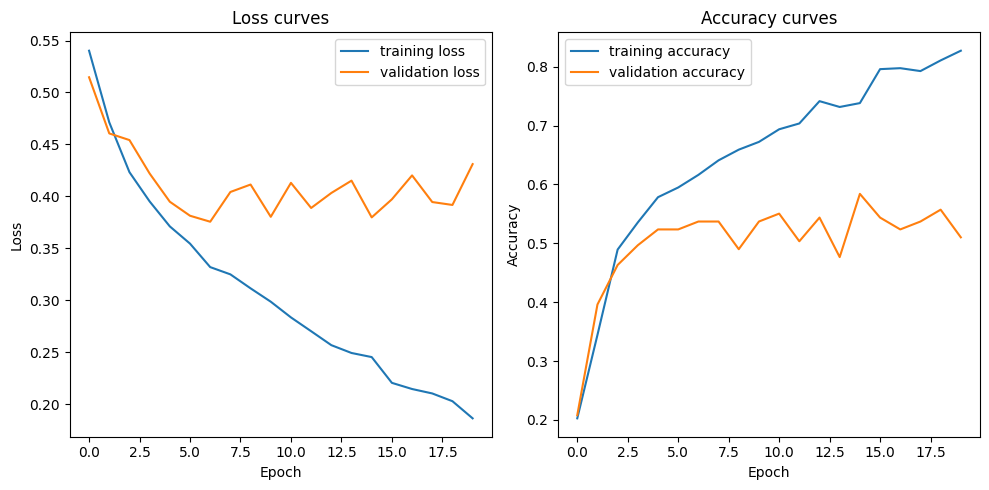

In [222]:
# Create a figure and a grid of subplots with a single call
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# Plot the loss curves on the first subplot
ax1.plot(history.history['loss'], label='training loss')
ax1.plot(history.history['val_loss'], label='validation loss')
ax1.set_title('Loss curves')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot the accuracy curves on the second subplot
ax2.plot(history.history['accuracy'], label='training accuracy')
ax2.plot(history.history['val_accuracy'], label='validation accuracy')
ax2.set_title('Accuracy curves')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

# Adjust the spacing between subplots
fig.tight_layout()

# Show the figure
plt.show()

In [223]:
test_image = image.load_img("data/testing_set/boat/boat.7.jpg", target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
printString = 'I think it is a '

training_set.class_indices

if result[0][0] == max(result[0]):
    print(printString+'boat')
elif result[0][1] == max(result[0]):
    print(printString+'bus')
elif result[0][2] == max(result[0]):
    print(printString+'car')
elif result[0][3] == max(result[0]):
    print(printString+'motorbike')
elif result[0][4] == max(result[0]):
    print(printString+'plane')

1/1 [==============================] - 0s 48ms/step
I think it is a boat


In [224]:
test_loss, test_acc = model.evaluate(test_set)
print('Test accuracy (model):', test_acc)


5/5 [==============================] - 0s 20ms/step - loss: 0.3465 - accuracy: 0.6104
Test accuracy (model): 0.6103895902633667


In [225]:
predicted_list=model.predict(test_set)
print(test_set.labels)

predicted_labels = []
for predict in predicted_list:
    if predict[0] == max(predict):
        predicted_labels.append(0)
    elif predict[1] == max(predict):
        predicted_labels.append(1)
    elif predict[2] == max(predict):
        predicted_labels.append(2)
    elif predict[3] == max(predict):
        predicted_labels.append(3)
    elif predict[4] == max(predict):
        predicted_labels.append(4)

print(predicted_labels)



5/5 [==============================] - 0s 18ms/step
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4]
[3, 2, 3, 0, 3, 4, 4, 3, 1, 3, 1, 1, 2, 1, 3, 1, 0, 3, 1, 2, 3, 2, 1, 2, 2, 4, 3, 1, 3, 3, 1, 2, 3, 3, 3, 0, 1, 3, 2, 2, 1, 0, 1, 3, 2, 2, 1, 1, 0, 1, 2, 2, 1, 2, 0, 3, 2, 4, 2, 1, 4, 2, 1, 1, 2, 3, 1, 4, 2, 3, 0, 0, 3, 3, 1, 1, 2, 2, 3, 1, 2, 1, 3, 0, 2, 1, 3, 3, 3, 4, 1, 2, 2, 4, 3, 3, 3, 2, 1, 0, 2, 4, 3, 4, 1, 1, 1, 2, 2, 2, 3, 1, 2, 2, 2, 2, 3, 2, 0, 1, 1, 2, 2, 3, 3, 0, 3, 2, 3, 1, 3, 0, 1, 0, 2, 2, 2, 3, 4, 3, 3, 3, 3, 0, 0, 1, 2, 3, 3, 0, 3, 4, 0, 4]


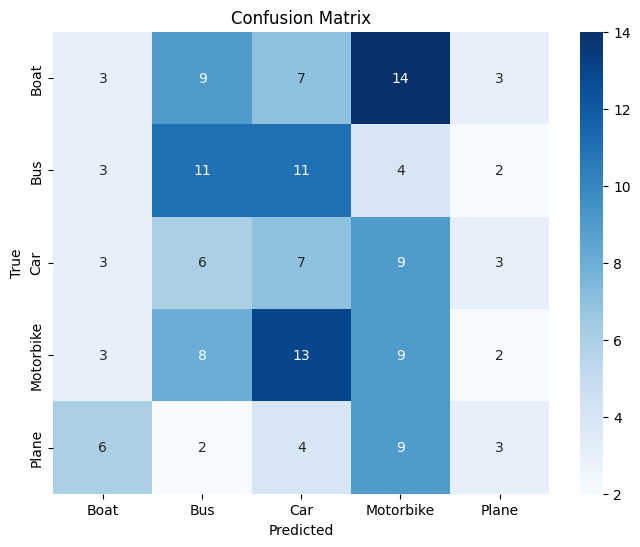

In [226]:
confusion = confusion_matrix(test_set.labels, predicted_labels)

class_labels = ["Boat", "Bus", "Car", "Motorbike", "Plane"]

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", xticklabels=class_labels, yticklabels=class_labels, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()